# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

ALL:         temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000
Male:         temperature  heart_rate
count    65.000000   65.000000
mean     98.104615   73.369231
std       0.698756    5.875184
min      96.300000   58.000000
25%      97.600000   70.000000
50%      98.100000   73.000000
75%      98.600000   78.000000
max      99.500000   86.000000
Female:         temperature  heart_rate
count    65.000000   65.000000
mean     98.393846   74.153846
std       0.743488    8.105227
min      96.400000   57.000000
25%      98.000000   68.000000
50%      98.400000   76.000000
75%      98.800000   80.000000
max     100.800000   89.000000


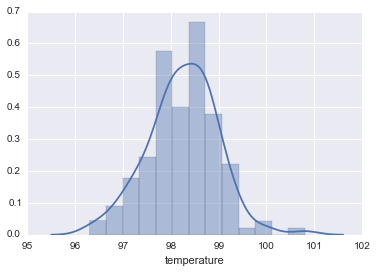

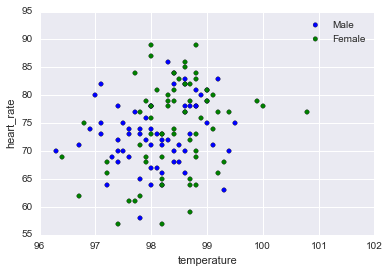

In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the data as a panda dataframe
df = pd.read_csv('data/human_body_temperature.csv')

# assign a subset as male and female dataframes
dfMale=df[df.gender=='M']
dfFemale=df[df.gender=='F']

# create a distribution plot via seaborn, ensure correct version of statsmodels=0.8.0
sns.distplot(df.temperature)

# create a scatterplot of male and female temperature vs heart rate in one chart
ax=dfMale.plot(kind='scatter', x='temperature', y='heart_rate', color='Blue', label='Male')
dfFemale.plot(kind='scatter', x='temperature', y='heart_rate', color='Green', label='Female', ax=ax )

print("ALL: ", df.describe())
print("Male: ", dfMale.describe())
print("Female: ", dfFemale.describe())
 

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as stats


pval = (stats.normaltest(df['temperature']))[1]
#print(pval)
if(pval < 0.05):
    print ("Not normal distribution")
else:
    print ("Normal distribution")

    '''Necessary Sample Size = (Z-score)2 * StdDev*(1-StdDev) / (margin of error)2
    
Here is how the math works assuming you chose a 95% confidence level, 
.5 standard deviation, and a margin of error (confidence interval) of +/- 5%.

((1.96)2 x .5(.5)) / (.05)2
(3.8416 x .25) / .0025
.9604 / .0025
384.16
385 respondents are needed'''

if df.shape[0] >= 30:
    print ("Sample size is large")
else:
    print ("Sample size is NOT large")

    ''' the occurrence of one observation provides no information about the occurrence of the other observation.
        Observations don't affect the probability for future observations.
     unrelated observations
    '''

Normal distribution
Sample size is large


In [4]:
from statsmodels.stats.weightstats import DescrStatsW, ttest_ind, ztest
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

print('Male vs Female temperature: (ttest, p-value, df)=', \
      ttest_ind(dfMale.temperature, dfFemale.temperature, alternative='two-sided'))
print('Male vs Female heart beat: (ttest, p-value, df)=', \
      ttest_ind(dfMale.heart_rate, dfFemale.heart_rate, alternative='two-sided'))
print('(ztest, p-value)=', ztest(df['temperature'], value=98.6, alternative='two-sided'))
print('CI tconfint=', DescrStatsW(df['temperature']).tconfint_mean())

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*
sample_size= df.shape[0] 
sample_mean= df['temperature'].mean()
pop_stdev = df['temperature'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)  

print("margin_of_error:", margin_of_error)


Male vs Female temperature: (ttest, p-value, df)= (-2.2854345381654984, 0.02393188312240236, 128.0)
Male vs Female heart beat: (ttest, p-value, df)= (-0.6319061024739937, 0.52857523970651132, 128.0)
(ztest, p-value)= (-5.4548232923645195, 4.9021570141012155e-08)
CI tconfint= (98.122002905608028, 98.376458632853499)
margin_of_error: 0.126034341049


In [5]:
import numpy as np
def cohens_d(x, y):
    lx = len(x)- 1
    ly = len(y)- 1
    md  = np.abs(x.mean() - y.mean())        ## mean difference (numerator)
    csd = lx * x.var() + ly * y.var()
    csd = csd/(lx + ly)
    #print(md)
    csd = np.sqrt(csd)                    ## common sd computation

    return md/csd                        ## cohen's d

def printCohen(x):
    if x >= .80:
        print("large effect")
    elif x >= .50:
        print("medium effect")
    elif x >= .20:
        print("small effect")
    else: print("no effect")    
    return x

cd=cohens_d(dfMale,dfFemale)
print("cohens D: male vs female")
print("(temperature)")
print(printCohen(cd[0]))
print("(heart_beat)")
print(printCohen(cd[1]))


cohens D: male vs female
(temperature)
small effect
0.40089173786
(heart_beat)
no effect
0.110843662925


<div class="span5 alert alert-info">
<h3>ANSWERS</h3>


<ol>
<li>  Is the distribution of body temperatures normal? <b> Yes, by looking that the distribution plot and test of normality, the distribution of body temperatures is normal (bell-curved).</b>
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?  <b>Yes, it is a large sample size since samples is more than 30. </b>
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?  <b>No, the population mean is different to 98.6 degrees F with high significance </b>
    <ul>
    <li> Would you use a one-sample or two-sample test? Why? <b>I used one-sample test since I am comparing one sample group and test if the average is different to 98.6.</b>
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic?  <b>t-statistic because the population variance is not known</b>
    <li> Now try using the other test. How is the result be different? Why?  <b>Using both ztest and ttest has the same result because the sample size is large (> 30).</b>
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?  <b>Abnormal temperature is less than 98.12 and more than 98.37. </b>
    <ul>
    <li> Start by computing the margin of error and confidence interval.  <b>Margin of error is .12 and confidence interval is (98.12, 98.37)</b>
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?  <b>Yes, there is a difference between Male temperature against female temperature. However, there is a small effect as shown by cohen's D ratio=.4 (small diff)</b>
    <ul>
    <li> What test did you use and why?  <b>I used t-test to compare male and female temperature and it is different at 98% level of significance </b>
    <li> Write a story with your conclusion in the context of the original problem.
    <h2> The Truth about 98.6<sup>o</sup>F</h2>
    <li> A study in 1992 shows that "normal" body temperature is not 98.6<sup>o</sup>F
    <li> Women are hotter than men 
    <li> Men and women have similar heart rate
    </ul>
    <ul>
    We have known to believed that normal body temperature is 98.6<sup>o</sup>F. Sometimes when you think you are not feeling well then check your temperature is not 98.6<sup>o</sup>F, then you confirms your thinking that your are really sick.  But in fact, this is not the truth.</ul> 
    <ul> A study in 1992 shows that the average human temperature is 98.2<sup>o</sup>F rather than 98.6<sup>o</sup>F. It was published at the Journal of American Medical Association with 130 respondents equally divided into male and female. The same study also showed that women are warmer than men.  Women on that study has an average body temperature of 98.4 versus 98.10 for men.  This debunks the common belief and many articles that says men are hotter than women [see article below].  
    </ul>
    <ul> So next time on your doctor visit and your body temperature reads than 98.2<sup>o</sup>F, then you need not be alarmed and you are normal.
    </ul>
</ol>
 
#### Resources

<li> Data source: http://www.amstat.org/publications/jse/datasets/normtemp.txt 
<li> Statsmodels: http://www.statsmodels.org/stable/stats.html
<li> Article: http://www.glamour.com/story/theres-a-scientific-reason-women-are-always-colder-than-men
****